<a href="https://colab.research.google.com/github/aayush1036/algorithm_trading_course/blob/master/Drawdown/Drawdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from matplotlib import style
style.use('dark_background')

Compute Drawdowns

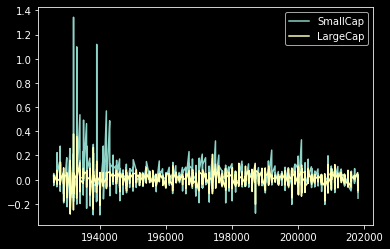

In [16]:
import pandas as pd
me_m = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', header = 0, index_col = 0, parse_dates = True, na_values = -99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [17]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


Index is used to access the indexing column which does not have a name while seeing the head of the dataframe.

In [18]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [19]:
rets.index = pd.to_datetime(rets.index, format="%Y%m") #converts the index into a YYYY MM DD format
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [20]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [21]:
rets.index = rets.index.to_period('M') #stes the data as a monthly data 
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [22]:
rets['1975'] #access all months of the year 1975

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [23]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [24]:
rets.info() #just like summary(rets) in R

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


Compute Drawdown


1.   Compute Wealth Index
2.   Compute previous peaks
3.   Compute drawdown - which is the wealth value as a percentage of the previous peak 



In [25]:
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

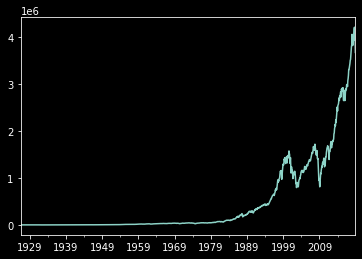

In [26]:
wealth_index.plot.line()

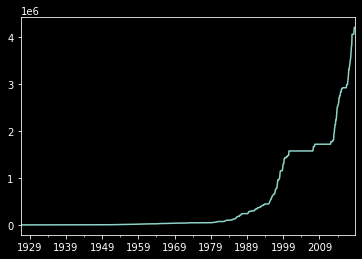

In [27]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

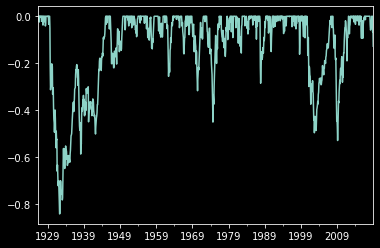

In [29]:
drawdown = (wealth_index-previous_peaks)/previous_peaks
drawdown.plot.line()

In [30]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [31]:
drawdown.min()

-0.8400375277943123

In [34]:
drawdown['1975':].min() #maximum drawdown since 1975

-0.5280945042309304

In [35]:
drawdown['1975':].idxmin() #returns the index (date) when there was the maximum loss(minimum drawdown)

Period('2009-02', 'M')

In [36]:
drawdown.idxmin()

Period('1932-05', 'M')

Creating our own function so that we have a reproducible code and we can parse all types of series in that function 

We write the docstring in triple quotes to give the users an idea about what the function inputs, what it does and what it can return 

In [41]:
def drawdown(return_series: pd.Series):
    """
    Takes a Time Series of asset returns and computes and returns a dataframe that contains 
    1) Wealth Idex 
    2) Previous Peaks
    3) Percentage of drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame(dict(Wealth = wealth_index, Peaks = previous_peaks, Drawdowns = drawdowns))

In [42]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


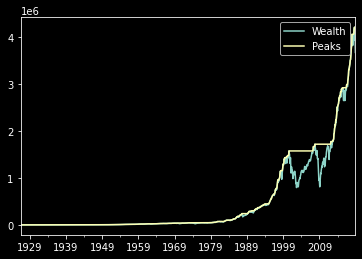

In [44]:
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot.line()

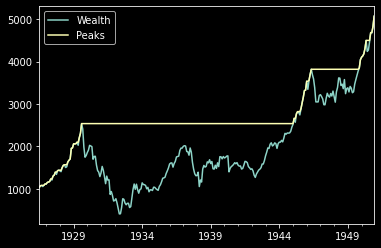

In [45]:
drawdown(rets[:'1950']['LargeCap'])[['Wealth', 'Peaks']].plot.line()

In [47]:
drawdown(rets[:'1950']['LargeCap']).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [49]:
drawdown(rets[:'1950']['LargeCap'])['Drawdowns'].min()

-0.8400375277943123

In [50]:
drawdown(rets['SmallCap'])['Drawdowns'].min()

-0.8330007793945303

In [51]:
drawdown(rets['SmallCap'])['Drawdowns'].idxmin()

Period('1932-05', 'M')

In [52]:
drawdown(rets['LargeCap'])['Drawdowns'].idxmin()

Period('1932-05', 'M')

In [54]:
drawdown(rets['1940':]['SmallCap'])['Drawdowns'].min()

-0.7000596091967917

In [56]:
drawdown(rets['1940':]['SmallCap'])['Drawdowns'].idxmin()

Period('1974-12', 'M')

In [57]:
drawdown(rets['1975':]['SmallCap'])['Drawdowns'].min()

-0.6312068077252386

In [58]:
drawdown(rets['1975':]['SmallCap'])['Drawdowns'].idxmin()

Period('2009-02', 'M')

In [59]:
drawdown(rets['1975':]['LargeCap'])['Drawdowns'].min()

-0.5280945042309303

In [60]:
drawdown(rets['1975':]['LargeCap'])['Drawdowns'].idxmin()

Period('2009-02', 'M')